In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('seattle-weather.csv')

In [3]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [4]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
#coulmn Open converted into numpy array
training_set = df.iloc[:,2:3].values
training_set

array([[12.8],
       [10.6],
       [11.7],
       ...,
       [ 7.2],
       [ 5.6],
       [ 5.6]])

In [7]:
len(training_set)

1461

In [8]:
def df_to_XY(df,window_size=10):
 X_train=[]
 y_train=[]

 for i in range(10,len(training_set)):
    X_train.append(training_set[i-10:i,0])
    y_train.append(training_set[i,0])

 X_train, y_train = np.array(X_train), np.array(y_train)
 return X_train, y_train

In [10]:
WINDOW = 10
X,y = df_to_XY(df,WINDOW)
print(len(X),len(y))
X_train = X[:800]
y_train = y[:800]
X_val = X[800:1000]
y_val = y[800:1000]
X_test = X[1000:]
x_test = y[1000:]

1451 1451


In [12]:
X

array([[12.8, 10.6, 11.7, ..., 10. ,  9.4,  6.1],
       [10.6, 11.7, 12.2, ...,  9.4,  6.1,  6.1],
       [11.7, 12.2,  8.9, ...,  6.1,  6.1,  6.1],
       ...,
       [ 8.3,  7.8,  5.6, ...,  4.4,  4.4,  5. ],
       [ 7.8,  5.6,  7.8, ...,  4.4,  5. ,  7.2],
       [ 5.6,  7.8,  5. , ...,  5. ,  7.2,  5.6]])

In [14]:
y

array([6.1, 6.1, 5. , ..., 7.2, 5.6, 5.6])

In [18]:
#Reshaping(To add new dimensions)
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_val = np.reshape(X_val,(X_val.shape[0],X_val.shape[1],1))
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))


In [22]:
#Building the RNN
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [23]:
regressor = Sequential()

In [24]:
#Addinf the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50, return_sequences = True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

#Output layer
regressor.add(Dense(units=1))

In [25]:
#Compiling
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [26]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam


In [27]:
#fitting the rnn to the training set
history=regressor.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=100, batch_size=32)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - loss: 258.5868 - val_loss: 230.3926
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 92.8847 - val_loss: 147.2890
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 68.8412 - val_loss: 120.7420
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 60.3697 - val_loss: 104.5484
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 61.1380 - val_loss: 93.8897
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 54.5849 - val_loss: 86.4206
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 55.6824 - val_loss: 82.2879
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 54.8915 - val_loss: 80.2104
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 60.1740 - val_loss: 77.9212
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 50.8308 - val_loss: 76.9358
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 51.2611 - val_loss: 76.6008
Epoch 12/100
25/25 ━━━━━━

In [28]:
his = pd.DataFrame(history.history)

In [29]:
his.head()

,loss,val_loss
0,204.519379,230.392563
1,85.731445,147.289001
2,65.279045,120.741982
3,59.520382,104.548409
4,56.916275,93.889679


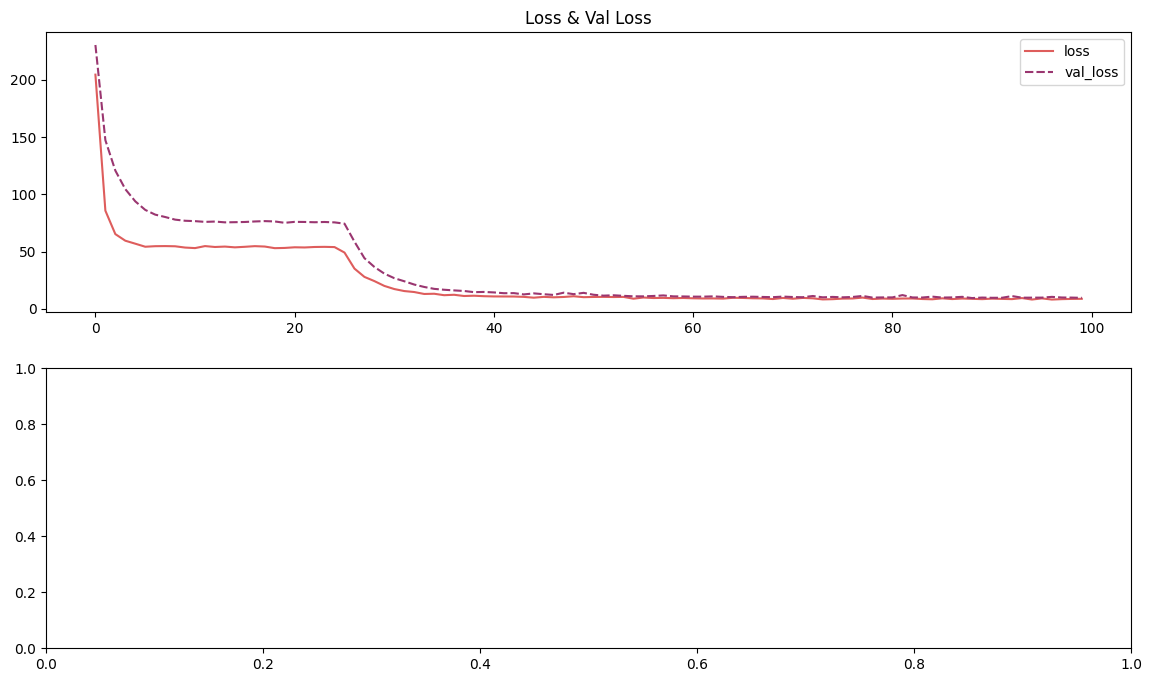

In [30]:
import seaborn as sns
his.columns
history_loss = his[['loss', 'val_loss']]


fig,axes = plt.subplots(2,1,figsize=(14,8))
plt.subplot(2,1,1)
plt.title("Loss & Val Loss")
sns.lineplot(history_loss,palette="flare");



In [31]:
train_pred = regressor.predict(X_train).flatten()
val_pred = regressor.predict(X_val).flatten()
test_pred = regressor.predict(X_test).flatten()

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


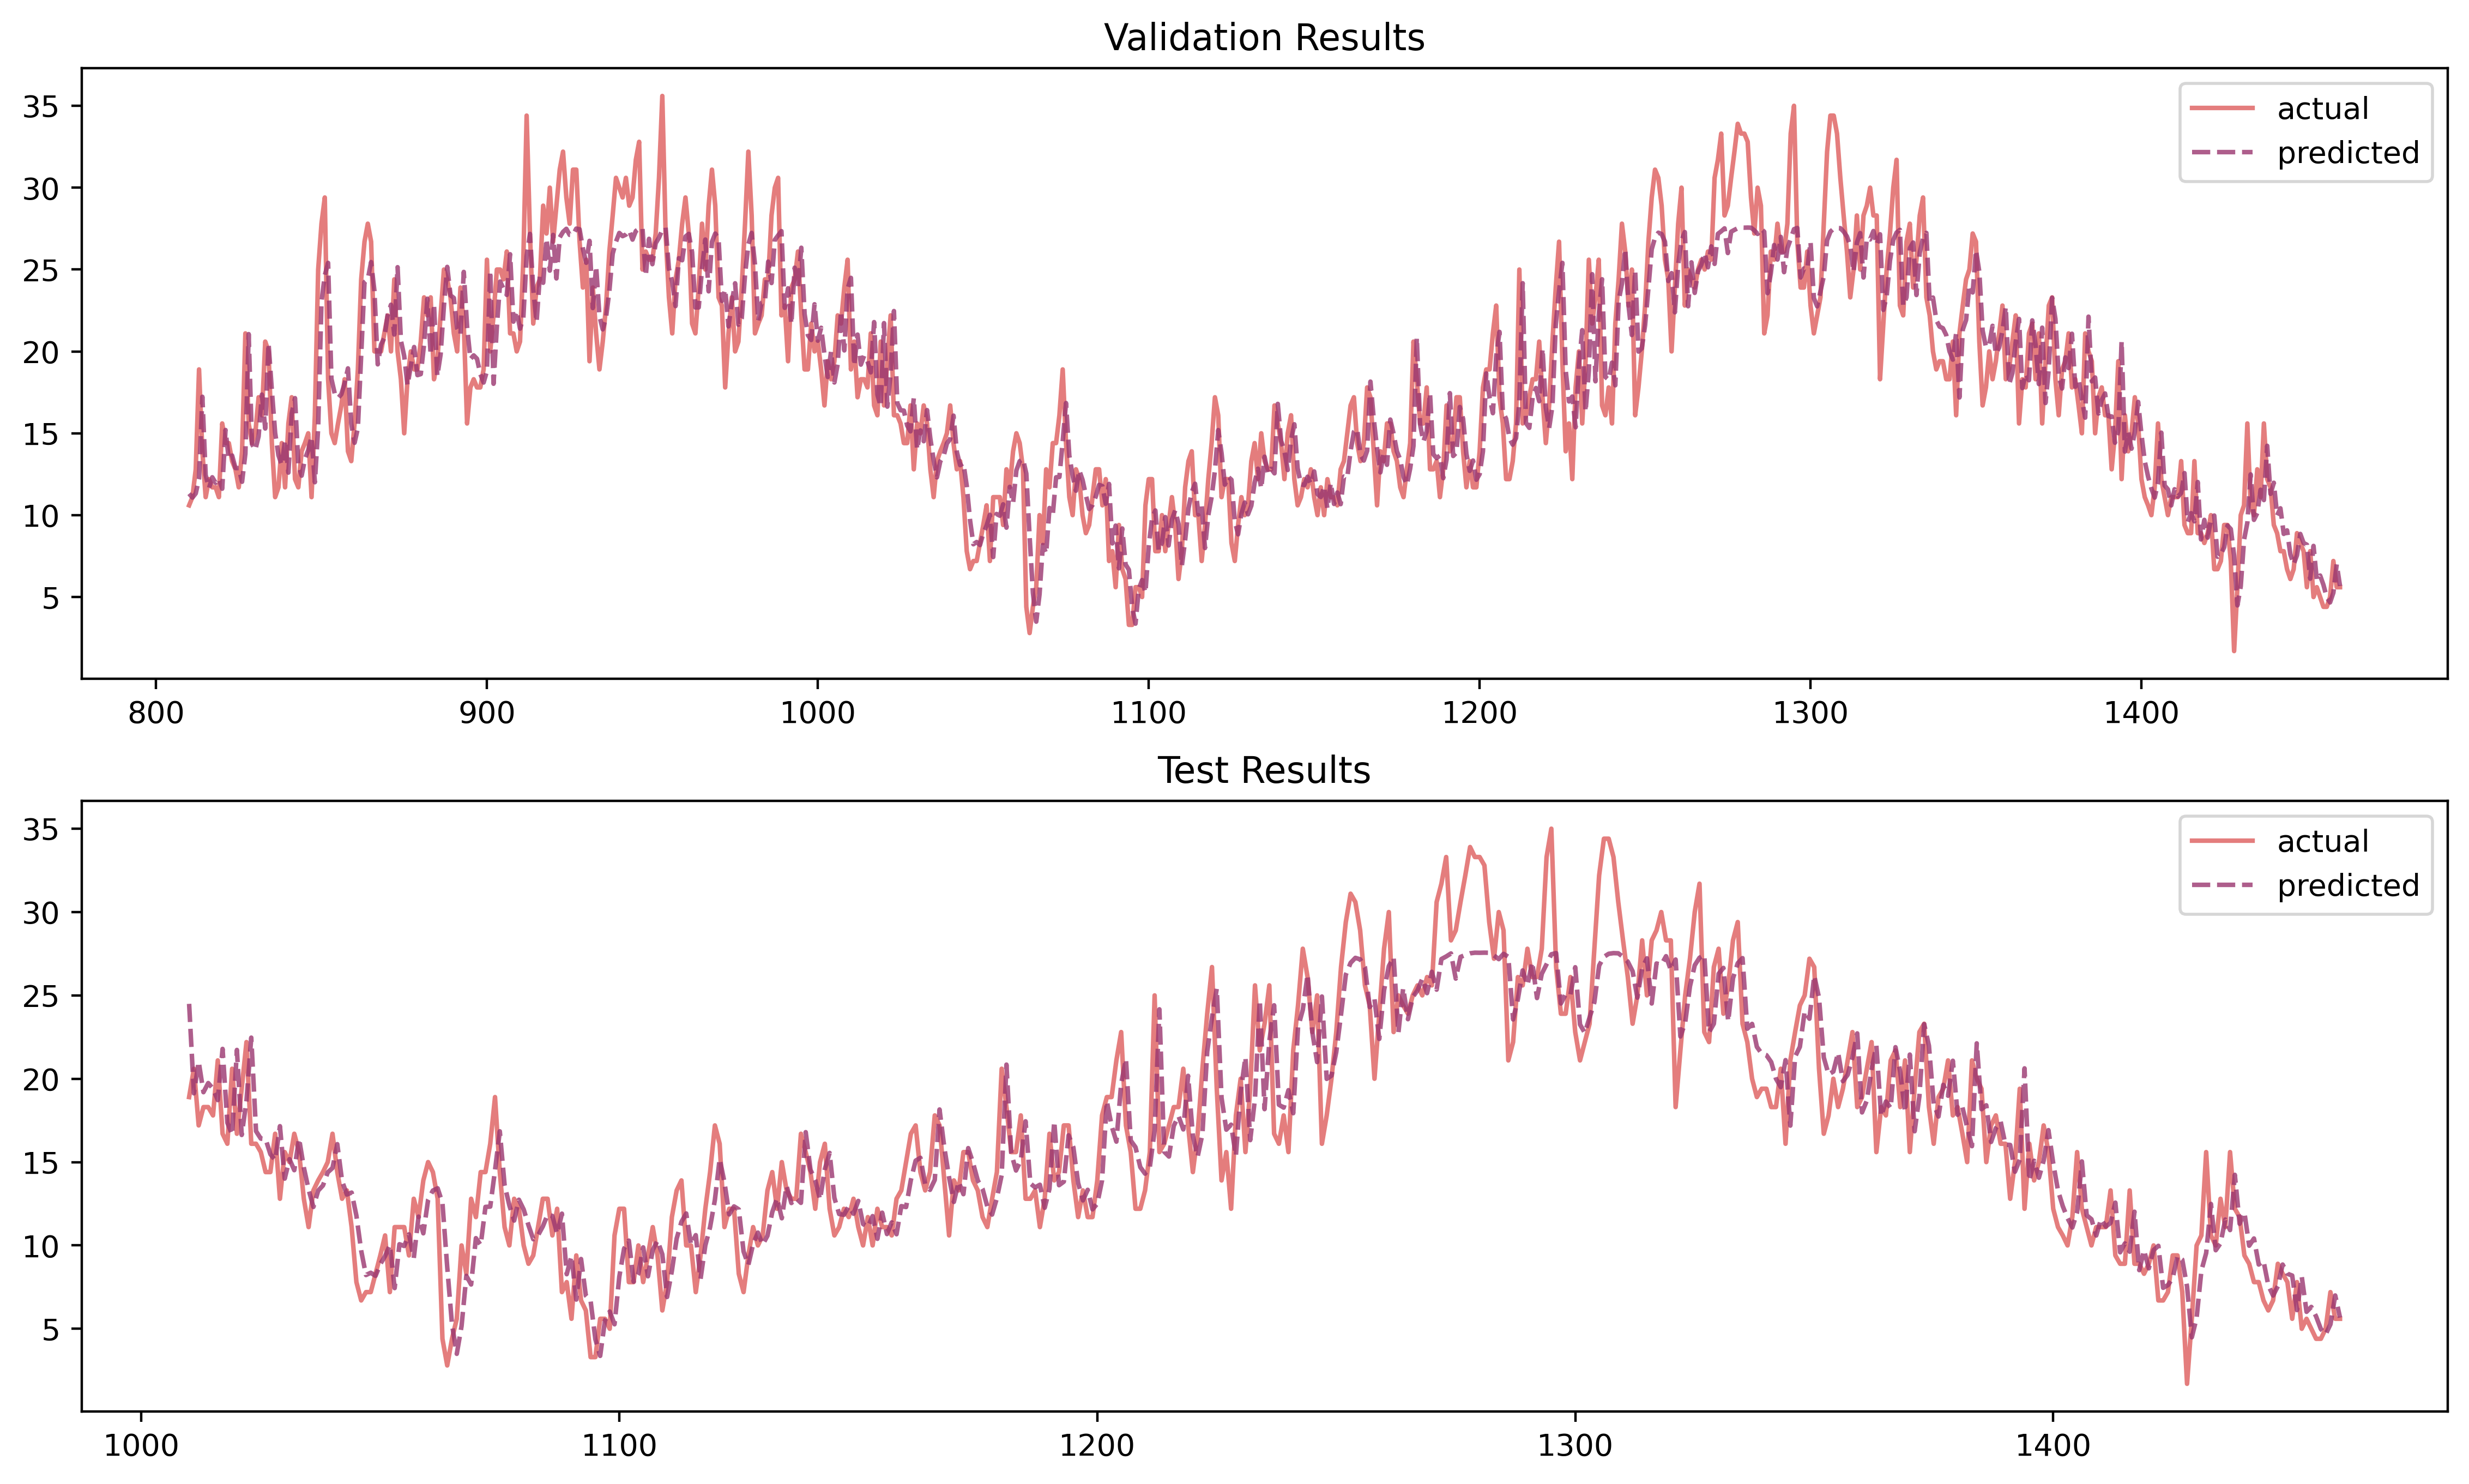

In [32]:
pred = np.concatenate([train_pred,val_pred,test_pred])
df_pred = pd.DataFrame(df["temp_max"].copy())
df_pred.columns=["actual"]
df_pred = df_pred[WINDOW:]
df_pred["predicted"] = pred

fig,axes = plt.subplots(2,1,figsize=(14,8),dpi=400)

plt.subplot(2,1,1)
plt.title("Validation Results")
sns.lineplot(df_pred[800:],alpha=0.8,palette="flare",linestyle=None);

plt.subplot(2,1,2)
plt.title("Test Results")
sns.lineplot(df_pred[1000:],alpha=0.8,palette="flare",linestyle=None);

In [33]:
his

,loss,val_loss
0,204.519379,230.392563
1,85.731445,147.289001
2,65.279045,120.741982
3,59.520382,104.548409
4,56.916275,93.889679
...,...,...
95,9.146276,9.826103
96,8.140209,10.483204
97,8.492779,9.931903
98,8.693017,9.839110
